# 1. Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
stock_return = pd.read_csv('data/Apple_S&P500.csv')
stock_return['Date'] = pd.to_datetime(stock_return['Date'])
stock_return.sort_values(by='Date', inplace=True)
stock_return.dropna(inplace=True)
stock_return.head()

,Date,S&P500,Apple,Change_S&P500,Change_Apple
226,2000-02-01,1366.420044,2.741432,-0.020108,0.104819
225,2000-03-01,1498.579956,3.248164,0.096720,0.184842
224,2000-04-01,1452.430054,2.967144,-0.030796,-0.086517
223,2000-05-01,1420.599976,2.008989,-0.021915,-0.322922
222,2000-06-01,1454.599976,2.505256,0.023934,0.247023


In [3]:
X = stock_return[['Change_S&P500']]
X = sm.add_constant(X)
y = stock_return['Change_Apple']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Change_Apple   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     77.16
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           4.08e-16
Time:                        21:02:13   Log-Likelihood:                 197.09
No. Observations:                 227   AIC:                            -390.2
Df Residuals:                     225   BIC:                            -383.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0210      0.007      3.089

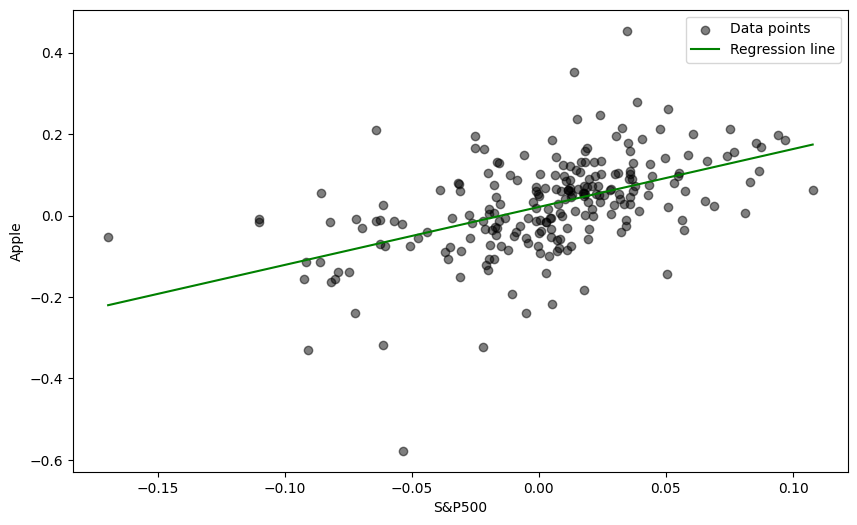

In [4]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stock_return['Change_S&P500'], stock_return['Change_Apple'], color='black', alpha=0.5, label='Data points')

# Regression line
X_pred = np.linspace(X['Change_S&P500'].min(), X['Change_S&P500'].max(), 100)
X_pred2 = sm.add_constant(X_pred)
y_pred = model.predict(X_pred2)
plt.plot(X_pred, y_pred, color='green', label='Regression line')

plt.xlabel('S&P500')
plt.ylabel('Apple')
plt.legend()
plt.show()

# 2. Multiple Regression

In [5]:
sales = pd.read_csv('data/Sales_Data.csv')
sales.head()

,Advertising,Shelf_Space,Sales
0,1173,25,7517.5
1,307,25,3555.0
2,1019,25,6152.5
3,1066,25,6222.5
4,1187,25,6655.0


In [6]:
X = sales[['Advertising', 'Shelf_Space']]
X = sm.add_constant(X)
y = sales['Sales']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     88.90
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           7.39e-15
Time:                        21:02:25   Log-Likelihood:                -308.62
No. Observations:                  40   AIC:                             623.2
Df Residuals:                      37   BIC:                             628.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2127.1938    347.511      6.121      

## 2.1. Multicollinearity

In [7]:
home_price = pd.read_csv('data/Home_Price_Data.csv')
home_price.head()

,SQRFOOT,BEDROOMS,AGE,PRICE
0,1650,2,10,232000
1,1800,3,5,275000
2,2530,4,9,510000
3,2380,3,21,382000
4,2000,3,8,278000


In [8]:
X = home_price[['SQRFOOT', 'BEDROOMS', 'AGE']]
X = sm.add_constant(X)
y = home_price['PRICE']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     54.23
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.52e-11
Time:                        21:02:35   Log-Likelihood:                -367.45
No. Observations:                  30   AIC:                             742.9
Df Residuals:                      26   BIC:                             748.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+05   4.58e+04     -2.607      0.0

In [9]:
correlation_matrix = home_price.corr()
print(correlation_matrix)

           SQRFOOT  BEDROOMS       AGE     PRICE
SQRFOOT   1.000000  0.835459  0.466909  0.870362
BEDROOMS  0.835459  1.000000  0.324190  0.721286
AGE       0.466909  0.324190  1.000000  0.124340
PRICE     0.870362  0.721286  0.124340  1.000000


## 2.2. Using Dummy Variables to Include Qualitative Information (Part 1)

In [10]:
salary = pd.read_csv('data/Salaries_Data.csv')
salary.head()

,Gender,Years,Salary
0,Male,4,75891
1,Female,3,57943
2,Female,4,52095
3,Male,1,65356
4,Female,5,73294


In [11]:
salary = pd.get_dummies(salary, columns=['Gender'], drop_first=True, dtype=int)
salary.head()

,Years,Salary,Gender_Male
0,4,75891,1
1,3,57943,0
2,4,52095,0
3,1,65356,1
4,5,73294,0


In [12]:
X = salary[['Years', 'Gender_Male']]
X = sm.add_constant(X)
y = salary['Salary']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     476.1
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.75e-41
Time:                        21:02:48   Log-Likelihood:                -723.93
No. Observations:                  73   AIC:                             1454.
Df Residuals:                      70   BIC:                             1461.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.466e+04   1290.583     34.603      

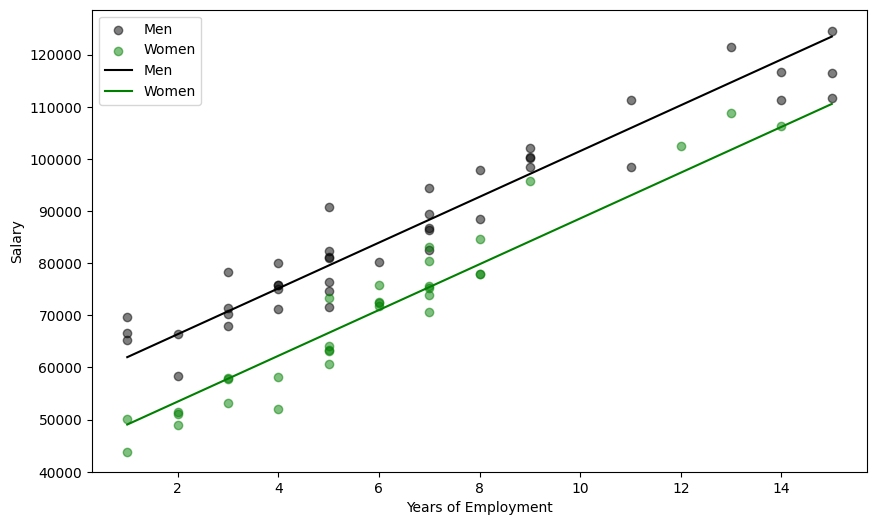

In [ ]:
men = salary[salary['Gender_Male'] == 1]
women = salary[salary['Gender_Male'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(men['Years'], men['Salary'], color='black', alpha=0.5, label='Men')
plt.scatter(women['Years'], women['Salary'], color='green', alpha=0.5, label='Women')

X_pred_men = np.linspace(X['Years'].min(), X['Years'].max(), 100)
X_pred_men = pd.DataFrame({'const': 1, 'Years': X_pred_men, 'Gender_Male': 1})
y_pred_men = model.predict(X_pred_men)
plt.plot(X_pred_men['Years'], y_pred_men, color='black', label='Men')

X_pred_women = np.linspace(X['Years'].min(), X['Years'].max(), 100)
X_pred_women = pd.DataFrame({'const': 1, 'Years': X_pred_women, 'Gender_Male': 0})
y_pred_women = model.predict(X_pred_women)
plt.plot(X_pred_women['Years'], y_pred_women, color='green', label='Women')

plt.xlabel('Years of Employment')
plt.ylabel('Salary')
plt.ylim(bottom=40000)
plt.legend()
plt.show()

## 2.3. Using Dummy Variables to Include Qualitative Information (Part 2)

In [14]:
home_price_2 = pd.read_csv('data/Home_Price_Data_2.csv')
home_price_2.head()

,Neighborhood,Sqft,Price
0,B,2754,750473
1,C,2170,428975
2,B,3022,799011
3,B,2420,734132
4,C,2559,499298


In [15]:
home_price_2 = pd.get_dummies(home_price_2, columns=['Neighborhood'], drop_first=True, dtype=int)
home_price_2.head()

,Sqft,Price,Neighborhood_B,Neighborhood_C
0,2754,750473,1,0
1,2170,428975,0,1
2,3022,799011,1,0
3,2420,734132,1,0
4,2559,499298,0,1


In [16]:
X = home_price_2[['Sqft', 'Neighborhood_B', 'Neighborhood_C']]
X = sm.add_constant(X)
y = home_price_2['Price']

model = sm.OLS(y, X).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.08e-95
Time:                        21:03:59   Log-Likelihood:                -1545.7
No. Observations:                 131   AIC:                             3099.
Df Residuals:                     127   BIC:                             3111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.441e+05   1.82e+04     35.

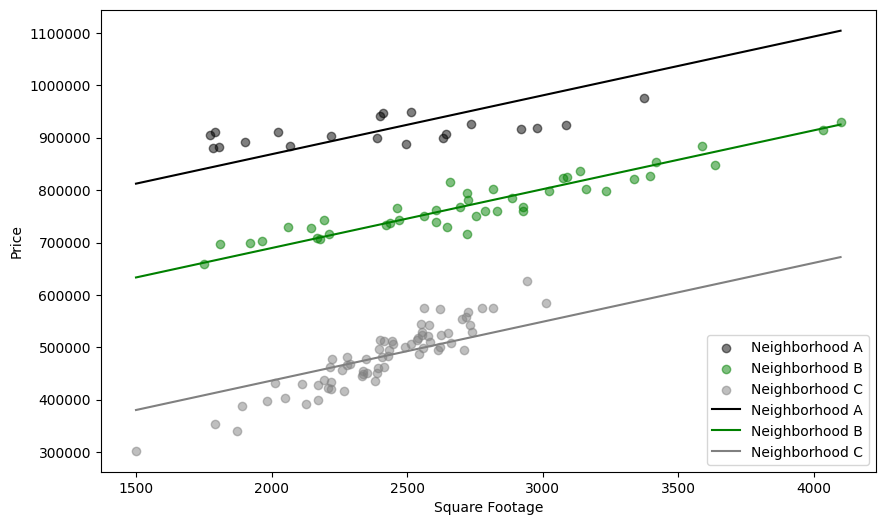

In [17]:
neighborhood_a = home_price_2[(home_price_2['Neighborhood_B'] == 0) & (home_price_2['Neighborhood_C'] == 0)]
neighborhood_b = home_price_2[home_price_2['Neighborhood_B'] == 1]
neighborhood_c = home_price_2[home_price_2['Neighborhood_C'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(neighborhood_a['Sqft'], neighborhood_a['Price'], color='black', alpha=0.5, label='Neighborhood A')
plt.scatter(neighborhood_b['Sqft'], neighborhood_b['Price'], color='green', alpha=0.5, label='Neighborhood B')
plt.scatter(neighborhood_c['Sqft'], neighborhood_c['Price'], color='grey', alpha=0.5, label='Neighborhood C')

X_pred_a = np.linspace(X['Sqft'].min(), X['Sqft'].max(), 100)
X_pred_a = pd.DataFrame({'const': 1, 'Sqft': X_pred_a, 'Neighborhood_B': 0, 'Neighborhood_C': 0})
y_pred_a = model.predict(X_pred_a)
plt.plot(X_pred_a['Sqft'], y_pred_a, color='black', label='Neighborhood A')

X_pred_b = np.linspace(X['Sqft'].min(), X['Sqft'].max(), 100)
X_pred_b = pd.DataFrame({'const': 1, 'Sqft': X_pred_b, 'Neighborhood_B': 1, 'Neighborhood_C': 0})
y_pred_b = model.predict(X_pred_b)
plt.plot(X_pred_b['Sqft'], y_pred_b, color='green', label='Neighborhood B')

X_pred_c = np.linspace(X['Sqft'].min(), X['Sqft'].max(), 100)
X_pred_c = pd.DataFrame({'const': 1, 'Sqft': X_pred_c, 'Neighborhood_B': 0, 'Neighborhood_C': 1})
y_pred_c = model.predict(X_pred_c)
plt.plot(X_pred_c['Sqft'], y_pred_c, color='grey', label='Neighborhood C')

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show()